## KNN --> K Nearest Neighbour

In [42]:
from scipy.spatial.distance import minkowski, cityblock, chebyshev, euclidean
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
u = [5, 3, 9]
v = [4, 6, 1]
#CITYBLOCK --> Manhattan
print("Manhattan Distance: ", sum(abs(i-j) for i, j in zip(u,v)))
print("Manhattan Distance: ", cityblock(u,v, w = None))
print("Manhattan Distance: ", minkowski(u, v, w=None, p=1))

#EUCLIDEAN
print("\nManhattan Distance: ", (sum((i-j)**2 for i, j in zip(u,v)))**0.5)
print("Manhattan Distance: ", euclidean(u,v, w = None))
print("Manhattan Distance: ", minkowski(u, v, w=None, p=2))


#CHEBYSHEV
print("\nManhattan Distance: ", (sum((i-j)**100 for i, j in zip(u,v)))**0.01)
print("Manhattan Distance: ", chebyshev(u,v, w = None))
print("Manhattan Distance: ", minkowski(u, v, w=None, p=100))

Manhattan Distance:  12
Manhattan Distance:  12
Manhattan Distance:  12.0

Manhattan Distance:  8.602325267042627
Manhattan Distance:  8.602325267042627
Manhattan Distance:  8.602325267042627

Manhattan Distance:  8.0
Manhattan Distance:  8
Manhattan Distance:  8.0


### KNN Classification Example

In [26]:
wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['Target']= wine.target
df.sample(5, random_state=54)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1
143,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0,2
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Targe

In [27]:
new_wine = pd.DataFrame([[11.98, 3.07,3.09 ,17.43, 100, 3, 2.45, 0.65, 2.88, 6, 1.5, 2, 1000]], 
                        columns=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'])

In [28]:
df.Target.value_counts()

1    71
0    59
2    48
Name: Target, dtype: int64

In [9]:
def euclidean_dis(x):
    a = x.to_numpy()
    b = new_wine.to_numpy()
    distance = (sum((i-j)**2 for i, j in zip(a,b[0])))**0.5
    return distance
df['distance'] = df.apply(euclidean_dis, axis=1)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target,distance
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,70.495541
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,50.503322
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,185.018717
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,480.192592
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,265.647885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,260.108897
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,250.094346
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,166.317644
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,161.330717


In [10]:
df_sort = df.sort_values('distance', ascending=True)
df_sort

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target,distance
32,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990.0,0,11.304150
47,13.90,1.68,2.12,16.0,101.0,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985.0,0,15.439109
23,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015.0,0,16.215264
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0,20.519249
56,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0,0,35.159447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0,0,680.061598
105,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315.0,1,685.101640
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0,1,688.061508
93,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0,1,710.114896


In [29]:
X = df.drop('Target', axis=1)
y = df['Target']
X_Train, X_Test, y_Train, y_Test = train_test_split(X , y, test_size=0.2, random_state=54)
len(X_Train), len(X_Test)

(142, 36)

In [30]:
ss = StandardScaler()
X_Train = ss.fit_transform(X_Train)
X_Test = ss.transform(X_Test)

In [31]:
model = KNeighborsClassifier()
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [32]:
model.fit(X_Train, y_Train)

KNeighborsClassifier()

In [33]:
y_pred = model.predict(X_Test)
y_pred

array([0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0])

In [34]:
print("Accuracy: ", accuracy_score(y_Test, y_pred))
print("Precision :", precision_score(y_Test, y_pred, average=None))
print("Recall :", recall_score(y_Test, y_pred, average=None))
print("F1-Score :", f1_score(y_Test, y_pred, average=None))
print("Classification Report :\n", classification_report(y_Test, y_pred))

Accuracy:  0.9444444444444444
Precision : [0.81818182 1.         1.        ]
Recall : [1.         0.84615385 1.        ]
F1-Score : [0.9        0.91666667 1.        ]
Classification Report :
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.85      0.92        13
           2       1.00      1.00      1.00        14

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [35]:
confusion_matrix(y_Test, y_pred)

array([[ 9,  0,  0],
       [ 2, 11,  0],
       [ 0,  0, 14]], dtype=int64)

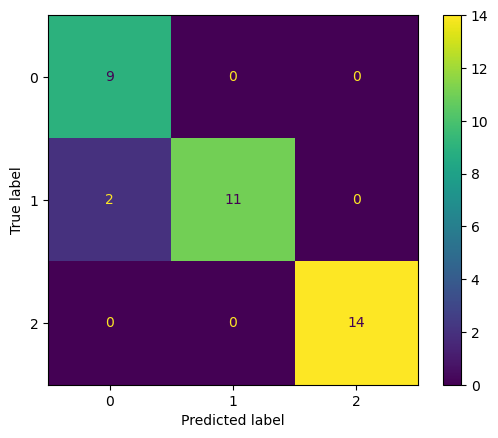

In [36]:
ConfusionMatrixDisplay.from_predictions(y_Test, y_pred)

In [38]:
test_error_list = []
for k in range(1,31):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_Train, y_Train)
    y_pred_test = knn_model.predict(X_Test)
    test_error = 1 - accuracy_score(y_Test, y_pred_test)
    test_error_list.append(test_error)
    print("For k={}, \t Error Rate: {} ".format(k, test_error))

For k=1, 	 Error Rate: 0.08333333333333337 
For k=2, 	 Error Rate: 0.08333333333333337 
For k=3, 	 Error Rate: 0.05555555555555558 
For k=4, 	 Error Rate: 0.08333333333333337 
For k=5, 	 Error Rate: 0.05555555555555558 
For k=6, 	 Error Rate: 0.05555555555555558 
For k=7, 	 Error Rate: 0.05555555555555558 
For k=8, 	 Error Rate: 0.05555555555555558 
For k=9, 	 Error Rate: 0.02777777777777779 
For k=10, 	 Error Rate: 0.08333333333333337 
For k=11, 	 Error Rate: 0.02777777777777779 
For k=12, 	 Error Rate: 0.02777777777777779 
For k=13, 	 Error Rate: 0.02777777777777779 
For k=14, 	 Error Rate: 0.02777777777777779 
For k=15, 	 Error Rate: 0.02777777777777779 
For k=16, 	 Error Rate: 0.02777777777777779 
For k=17, 	 Error Rate: 0.02777777777777779 
For k=18, 	 Error Rate: 0.02777777777777779 
For k=19, 	 Error Rate: 0.02777777777777779 
For k=20, 	 Error Rate: 0.02777777777777779 
For k=21, 	 Error Rate: 0.02777777777777779 
For k=22, 	 Error Rate: 0.02777777777777779 
For k=23, 	 Error R

In [41]:
params = {'n_neighbors':list(range(1,20))}
gs = GridSearchCV(estimator=KNeighborsClassifier(),
                 param_grid=params,
                 scoring='accuracy',
                 cv=5)
gs.fit(X_Train, y_Train)
print("Best Score:", gs.best_score_)
print("Best valu of K:", gs.best_params_)

Best Score: 0.9790640394088671
Best valu of K: {'n_neighbors': 15}


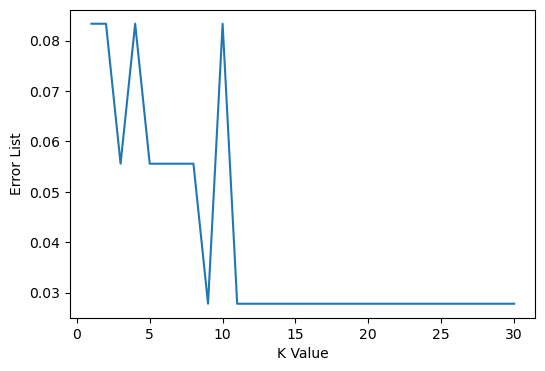

In [44]:
plt.figure(figsize=(6,4), dpi=100)
plt.plot(range(1,31), test_error_list)
plt.ylabel('Error List')
plt.xlabel('K Value')
plt.show()